In [42]:
import numpy as np, matplotlib.pyplot as plt
from sympy import oo, Matrix, lambdify
from sympy.abc import x,y
from sympy.tensor import derive_by_array
from scipy.optimize import minimize

In [2]:
plt.xkcd();

In [3]:
xx = np.linspace(-2,3.5)
yy = np.linspace(-2,2.5)
X,Y = np.meshgrid(xx,yy)

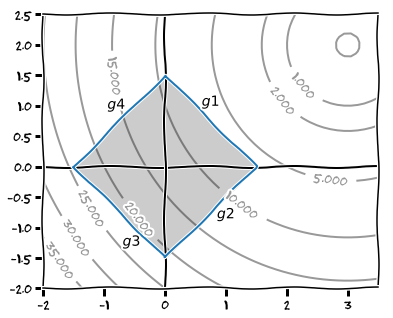

In [4]:
plt.figure(figsize=(6,6))
plt.axes(aspect='equal')
plt.axhline(color='k')
plt.axvline(color='k')
plt.xlim(-2,3.5)
plt.ylim(-2,2.5)
plt.plot([-3/2, 0, 3/2, 0, -3/2],[0,3/2,0,-3/2, 0])
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
CS = plt.contour(X,Y,(X-3)**2+(Y-2)**2, colors='k', alpha=0.4,
                levels = [0.04,1,2,5,10,15,20,25,30,35])
plt.clabel(CS)
plt.text(0.6,1,'$g1$')
plt.text(0.85,-0.85,'$g2$')
plt.text(-0.7,-1.3,'$g3$')
plt.text(-0.95,0.95,'$g4$')
plt.show()

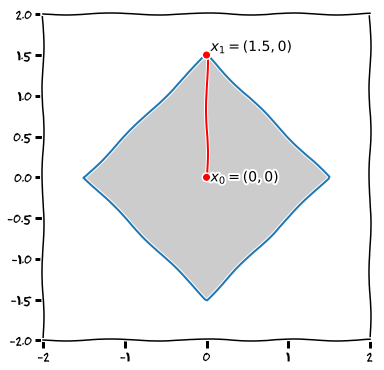

In [5]:
plt.figure(figsize=(6,6))
plt.axes(aspect='equal')
# plt.axhline(color='k')
# plt.axvline(color='k')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-3/2, 0, 3/2, 0, -3/2],[0,3/2,0,-3/2, 0])
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.text(0.05,-0.05,'$x_0=(0,0)$')
plt.text(0.05,1.55,'$x_1=(1.5,0)$')
# plt.text(-0.7,-1.3,'$g3$')
# plt.text(-0.95,0.95,'$g4$')
# plt.plot(0,0,'ro')
# plt.plot(0,1.5,'ro')
plt.plot([0,0],[0,1.5],'r-o')
plt.show()

In [58]:
def frankwolfe(f,constraints,tolerance,initial_guess):
    # f is a sympy expression on x and y
    # constraints is a...
    # tolerance is a floating point value (positive)
    # initial_guess is a dictionary {x: value, y:value}
    
    # Initialization
    xo = initial_guess[x]
    yo = initial_guess[y]
    LB=-oo
    UB=f.subs(initial_guess)
    
    # Iteration
#     while np.abs(UB-LB) < tolerance:
    L = Matrix(1,2,derive_by_array(f,[x,y]).subs(initial_guess))*Matrix(2,1,[x-xo,y-yo])
    L = lambdify((x,y),L[0])
        
    return LB, UB, L

In [59]:
frankwolfe((x-3)**2+(y-2)**2,0,oo,{x:0,y:0})